In [1]:
!pip install autograd

In [32]:
from baselines import *
from uncertainty import *

from autograd import numpy as np
from autograd import grad, elementwise_grad
from autograd.misc.optimizers import adam, sgd
from sklearn.datasets import make_moons
import numpy.random as npr
import pandas as pd
import numpy 
import scipy as sp
import matplotlib.pyplot as plt
import sys
%matplotlib inline


In [5]:
# Generate a toy dataset for classification
samples = 100
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_train = np.vstack((class_0, class_1))
y_train = np.array([0] * 100 + [1] * 100)

In [88]:
# Deterministic model 
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

###neural network model design choices
width = 4
hidden_layers = 3
input_dim = x_train.shape[1]
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

In [89]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}
        
#fit my neural network to minimize MSE on the given data
nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 0.0002)

Iteration 0 lower bound 0.49658657358720115; gradient mag: 0.04157853782150118
Iteration 100 lower bound 0.44329894629034894; gradient mag: 0.22447316276700693
Iteration 200 lower bound 0.11120727176261998; gradient mag: 0.27540309857677253
Iteration 300 lower bound 0.05091007690831589; gradient mag: 0.09102576079018303
Iteration 400 lower bound 0.038477455971102435; gradient mag: 0.056626437129771515
Iteration 500 lower bound 0.03225368860144092; gradient mag: 0.032154421461233616
Iteration 600 lower bound 0.029545245044963354; gradient mag: 0.023007578019890673
Iteration 700 lower bound 0.02745384996364988; gradient mag: 0.02011080567791864
Iteration 800 lower bound 0.026006875501352538; gradient mag: 0.017308824147857484
Iteration 900 lower bound 0.024586605983174165; gradient mag: 0.016077908288138865
Iteration 1000 lower bound 0.02333152594691717; gradient mag: 0.01281022958084321
Iteration 1100 lower bound 0.022395513171062715; gradient mag: 0.012714783764154998
Iteration 1200 lo

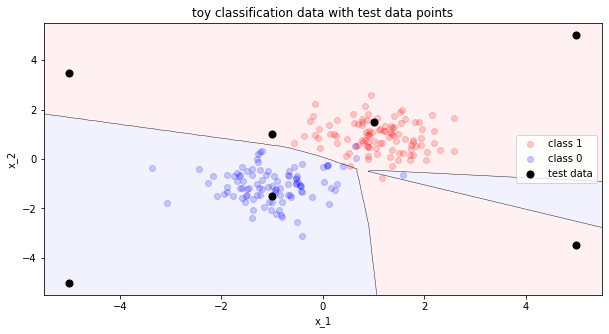

In [90]:
# defining test points
test_points = [(-5, -5), (-5, 3.5), (5, 5), (5, -3.5), (-1, 1), (-1, -1.5), (1, 1.5)]

# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plot_decision_boundary(x_train, y_train, [nn], ax, poly_degree=1, test_points=test_points, shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')
plt.show()

In [9]:
# Deep ensemble
reg_param = 0.0002
random = np.random.RandomState(rand_state)
N_bootstrap = 20
nn_all, w_bootstrap = ensemble(x_train, y_train, Feedforward, architecture, params, random, N_bootstrap, reg_param)

/Users/zoe/Desktop/AM207/Project/baselines.py:329: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  data = pd.DataFrame(pd.np.column_stack([x_train, y_train]))


Iteration 0 lower bound 0.4421523071106704; gradient mag: 0.11777242131308087
Iteration 100 lower bound 0.35981491574096536; gradient mag: 0.4849967882136736
Iteration 200 lower bound 0.08917782474426982; gradient mag: 0.24261235867993805
Iteration 300 lower bound 0.043925978289385145; gradient mag: 0.09612015952838858
Iteration 400 lower bound 0.030530095929150534; gradient mag: 0.0585391554207244
Iteration 500 lower bound 0.023357528318868184; gradient mag: 0.03396376535988156
Iteration 600 lower bound 0.019307414771951758; gradient mag: 0.024558305280489266
Iteration 700 lower bound 0.01658443882000875; gradient mag: 0.020331745188550177
Iteration 800 lower bound 0.0149297338867422; gradient mag: 0.0145338109060698
Iteration 900 lower bound 0.013911220674813356; gradient mag: 0.010243697355905811
Iteration 1000 lower bound 0.013256335979705283; gradient mag: 0.008047864966960066
Iteration 1100 lower bound 0.012791994951772745; gradient mag: 0.0069967085515699745
Iteration 1200 lower

Iteration 4900 lower bound 0.009248008904328593; gradient mag: 0.004727889758838106
Calculations done 1/20
Iteration 0 lower bound 0.1355681369500249; gradient mag: 0.20120713687460182
Iteration 100 lower bound 0.08732930865493506; gradient mag: 0.12138094685783359
Iteration 200 lower bound 0.06377969345902454; gradient mag: 0.08885429907063132
Iteration 300 lower bound 0.05059830383744018; gradient mag: 0.0652925973837443
Iteration 400 lower bound 0.043168811025470516; gradient mag: 0.05291550788922754
Iteration 500 lower bound 0.037368659958030834; gradient mag: 0.046591527139017166
Iteration 600 lower bound 0.032478009525260886; gradient mag: 0.04176228968405076
Iteration 700 lower bound 0.028911735936247362; gradient mag: 0.03660953554489667
Iteration 800 lower bound 0.026163482977305103; gradient mag: 0.03285982378684652
Iteration 900 lower bound 0.023938792805034366; gradient mag: 0.029747183551564936
Iteration 1000 lower bound 0.022074703038488734; gradient mag: 0.02712331383146

Iteration 4800 lower bound 0.010731856024549711; gradient mag: 0.0013523808373761329
Iteration 4900 lower bound 0.010703054010483007; gradient mag: 0.0009078534453089689
Calculations done 3/20
Iteration 0 lower bound 0.26562611014911564; gradient mag: 0.3968421572600799
Iteration 100 lower bound 0.16138492305161567; gradient mag: 0.30255657901845145
Iteration 200 lower bound 0.10667569140549153; gradient mag: 0.17090957756360003
Iteration 300 lower bound 0.08458641232526083; gradient mag: 0.1142979951720414
Iteration 400 lower bound 0.0672426188118761; gradient mag: 0.07629626392129306
Iteration 500 lower bound 0.05810478670401113; gradient mag: 0.060610108208832066
Iteration 600 lower bound 0.05129541113709458; gradient mag: 0.05126995051546904
Iteration 700 lower bound 0.046267903520309066; gradient mag: 0.044777547178363096
Iteration 800 lower bound 0.042158020679667; gradient mag: 0.03978888642114145
Iteration 900 lower bound 0.03877894726201916; gradient mag: 0.035985855270826025


Iteration 4800 lower bound 0.024572988104322367; gradient mag: 0.007547696467396756
Iteration 4900 lower bound 0.024331895617312038; gradient mag: 0.007113310470370772
Calculations done 5/20
Iteration 0 lower bound 0.37482595802850355; gradient mag: 0.20027448584152036
Iteration 100 lower bound 0.2973683396036743; gradient mag: 0.21047062039924908
Iteration 200 lower bound 0.24846115287382378; gradient mag: 0.1039390092980761
Iteration 300 lower bound 0.22803421021275813; gradient mag: 0.11705552929632186
Iteration 400 lower bound 0.19363950958077758; gradient mag: 0.11808236569666372
Iteration 500 lower bound 0.16384688275795134; gradient mag: 0.11952894569823119
Iteration 600 lower bound 0.13890573048376778; gradient mag: 0.11853502018161684
Iteration 700 lower bound 0.11999676250016461; gradient mag: 0.1039444301401655
Iteration 800 lower bound 0.10707302465641505; gradient mag: 0.09888256910044027
Iteration 900 lower bound 0.09618736137262583; gradient mag: 0.09283570032363406
Iter

Iteration 4600 lower bound 0.006337518205086596; gradient mag: 0.0010656467708671283
Iteration 4700 lower bound 0.00629294088803991; gradient mag: 0.0010572368561551037
Iteration 4800 lower bound 0.006246454375201156; gradient mag: 0.001056416407686415
Iteration 4900 lower bound 0.006196368946582912; gradient mag: 0.0010577472423862228
Calculations done 7/20
Iteration 0 lower bound 0.22751494222082363; gradient mag: 0.25226913775944343
Iteration 100 lower bound 0.15748154500911407; gradient mag: 0.2084558448972706
Iteration 200 lower bound 0.11594590079920461; gradient mag: 0.12008129667991675
Iteration 300 lower bound 0.09332268009411863; gradient mag: 0.09332472388153826
Iteration 400 lower bound 0.0407492373003611; gradient mag: 0.0629705764334175
Iteration 500 lower bound 0.02832997818481187; gradient mag: 0.03655399407300923
Iteration 600 lower bound 0.023714418830971924; gradient mag: 0.02737961520809354
Iteration 700 lower bound 0.020918785741627793; gradient mag: 0.022288524889

Iteration 4400 lower bound 0.0027922738255682523; gradient mag: 0.0038316021344590025
Iteration 4500 lower bound 0.002719462603340248; gradient mag: 0.0021675697629956366
Iteration 4600 lower bound 0.002651640553898494; gradient mag: 0.0035493478820036
Iteration 4700 lower bound 0.00258951333192969; gradient mag: 0.0038577201726301253
Iteration 4800 lower bound 0.0025306299194862024; gradient mag: 0.0018526450451760903
Iteration 4900 lower bound 0.0024771439929929186; gradient mag: 0.001779666027569909
Calculations done 9/20
Iteration 0 lower bound 0.5109878812797323; gradient mag: 0.05691107453855829
Iteration 100 lower bound 0.4790678476898594; gradient mag: 0.1462203375126928
Iteration 200 lower bound 0.3926524523343612; gradient mag: 0.30672588118425365
Iteration 300 lower bound 0.2473320235523677; gradient mag: 0.3415936911162695
Iteration 400 lower bound 0.14532583469166763; gradient mag: 0.21628205641709752
Iteration 500 lower bound 0.10575168266123998; gradient mag: 0.127422167

Iteration 4400 lower bound 0.020345603523049403; gradient mag: 0.0038849574528350334
Iteration 4500 lower bound 0.020241944093935618; gradient mag: 0.004135074842555228
Iteration 4600 lower bound 0.01953014395416896; gradient mag: 0.007959789782869745
Iteration 4700 lower bound 0.01918379541738741; gradient mag: 0.0046039268138210465
Iteration 4800 lower bound 0.018879288449833012; gradient mag: 0.011092434512256904
Iteration 4900 lower bound 0.018557789072000425; gradient mag: 0.011934310486074374
Calculations done 11/20
Iteration 0 lower bound 0.4343552934360898; gradient mag: 0.4530065739886358
Iteration 100 lower bound 0.33272559220007647; gradient mag: 0.4346923545659392
Iteration 200 lower bound 0.2771551380659322; gradient mag: 0.2375405400650358
Iteration 300 lower bound 0.2586993516771501; gradient mag: 0.13996868555495257
Iteration 400 lower bound 0.2501084554167394; gradient mag: 0.013728244189445302
Iteration 500 lower bound 0.2495725798806346; gradient mag: 0.0172824184676

/Users/zoe/opt/anaconda3/envs/py/lib/python3.8/site-packages/autograd/numpy/linalg.py:89: RuntimeWarning: invalid value encountered in true_divide
  return expand(g / ans) * x


Iteration 4100 lower bound nan; gradient mag: nan
Iteration 4200 lower bound nan; gradient mag: nan
Iteration 4300 lower bound nan; gradient mag: nan
Iteration 4400 lower bound nan; gradient mag: nan
Iteration 4500 lower bound nan; gradient mag: nan
Iteration 4600 lower bound nan; gradient mag: nan
Iteration 4700 lower bound nan; gradient mag: nan
Iteration 4800 lower bound nan; gradient mag: nan
Iteration 4900 lower bound nan; gradient mag: nan
Calculations done 13/20
Iteration 0 lower bound 0.07900977767604114; gradient mag: 0.17311379874774707
Iteration 100 lower bound 0.04388157564810663; gradient mag: 0.06333641910443626
Iteration 200 lower bound 0.03175584753967887; gradient mag: 0.03657498847336666
Iteration 300 lower bound 0.024285753843533882; gradient mag: 0.02526525475391291
Iteration 400 lower bound 0.019173813461566803; gradient mag: 0.013863698802737126
Iteration 500 lower bound 0.016899209733657553; gradient mag: 0.009333512758172503
Iteration 600 lower bound 0.015842945

Iteration 100 lower bound 0.11579327252854309; gradient mag: 0.12665268692351192
Iteration 200 lower bound 0.07850047878430039; gradient mag: 0.07986554157858675
Iteration 300 lower bound 0.05390747920276578; gradient mag: 0.061311434810165794
Iteration 400 lower bound 0.037328435879728714; gradient mag: 0.04817596097472643
Iteration 500 lower bound 0.027485844087235138; gradient mag: 0.03466332808405464
Iteration 600 lower bound 0.022611926288740508; gradient mag: 0.022267747733287994
Iteration 700 lower bound 0.020241553779374487; gradient mag: 0.014649442406210581
Iteration 800 lower bound 0.019067551459390028; gradient mag: 0.010569618756814683
Iteration 900 lower bound 0.01842051952570819; gradient mag: 0.007496967100306217
Iteration 1000 lower bound 0.01801468357453741; gradient mag: 0.005932219474348529
Iteration 1100 lower bound 0.017687046052425846; gradient mag: 0.005203016371944061
Iteration 1200 lower bound 0.017364418744232737; gradient mag: 0.0049641236255829405
Iteration

Iteration 100 lower bound 0.20746853516860755; gradient mag: 0.19190252205412286
Iteration 200 lower bound 0.1516744297124304; gradient mag: 0.12897836961940587
Iteration 300 lower bound 0.11690678456576697; gradient mag: 0.09438373226368102
Iteration 400 lower bound 0.09550922133767863; gradient mag: 0.06774107058543556
Iteration 500 lower bound 0.08140461468802342; gradient mag: 0.0547879614402314
Iteration 600 lower bound 0.07104836482756816; gradient mag: 0.04234096278523951
Iteration 700 lower bound 0.06239567401026667; gradient mag: 0.03864330191473937
Iteration 800 lower bound 0.05536490851440869; gradient mag: 0.030940350794679616
Iteration 900 lower bound 0.05049145119686654; gradient mag: 0.022957184674062485
Iteration 1000 lower bound 0.0473436748585215; gradient mag: 0.021510895920532205
Iteration 1100 lower bound 0.04346718672455302; gradient mag: 0.028187813036058617
Iteration 1200 lower bound 0.03496032721499369; gradient mag: 0.04635767853438313
Iteration 1300 lower bou

/Users/zoe/Desktop/AM207/Project/baselines.py:492: UserWarning: No contour levels were found within the data range.
  CS=ax.contour(x1, x2, yy, colors='black', linewidths=linewidths, alpha=alpha_line,levels=[-0.5,0.5, 1.5])


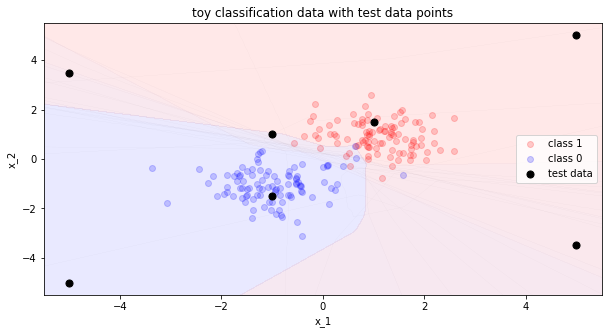

In [10]:
# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plot_decision_boundary(x_train, y_train, nn_all, ax, poly_degree=1, test_points=test_points, shaded=True)

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')
plt.show()

In [12]:
# set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

width = 6
hidden_layers = 2
input_dim = x_train.shape[1]
output_dim = 1

architecture_dropout = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.1,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}


#instantiate a Feedforward neural network object
nn_dropout = Feedforward_Dropout(architecture_dropout, random=random)

params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
#fit my neural network to minimize MSE on the given data
nn_dropout.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = .001)

Iteration 0 lower bound 0.50630187084174; gradient mag: 0.1676383477097556
Iteration 100 lower bound 0.5003561998658653; gradient mag: 0.026296592389470276
Iteration 200 lower bound 0.47528912867696244; gradient mag: 0.10438312894147678
Iteration 300 lower bound 0.3391275325719335; gradient mag: 0.12186449825568102
Iteration 400 lower bound 0.08183185066353184; gradient mag: 0.045446353232383635
Iteration 500 lower bound 0.13417781524162348; gradient mag: 0.4389274905410944
Iteration 600 lower bound 0.03667565949670605; gradient mag: 0.2053915492094807
Iteration 700 lower bound 0.0504100555359694; gradient mag: 0.11696375715366747
Iteration 800 lower bound 0.032948514038606415; gradient mag: 0.09892073614640169
Iteration 900 lower bound 0.29021831630428274; gradient mag: 0.014507455370402527
Iteration 1000 lower bound 0.28692949072810603; gradient mag: 0.048126413508658476
Iteration 1100 lower bound 0.099577613839225; gradient mag: 0.09645528951456751
Iteration 1200 lower bound 0.02595

Iteration 9900 lower bound 0.02170808212168035; gradient mag: 0.08012393706103452


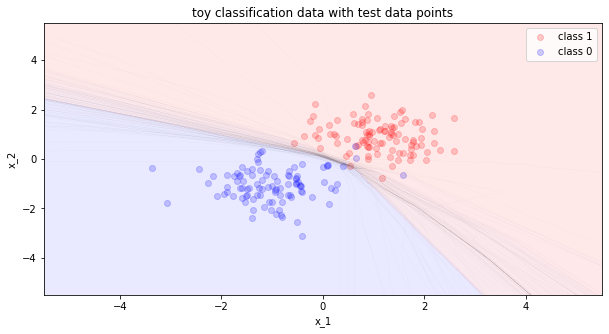

In [13]:
# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_decision_boundary(x_train, y_train, [nn_dropout]*100, ax, poly_degree=1, test_points=None, shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

xx (14400, 2)


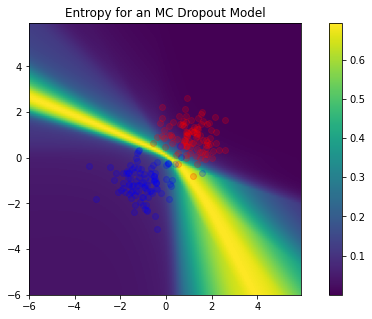

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_entropycontours(x_train, y_train, nn_dropout, [nn_dropout.weights]*50, ax, 'Entropy for an MC Dropout Model', poly_degree=1, test_points=test_points, shaded=True)# for i in range(len(test_points)):
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

In [15]:
S = 20
max_iteration = 15000
step_size = 1e-3

Sigma_W = np.eye(nn.D)*25
sigma_y = 1

variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)


Optimizing variational parameters...
Iteration 0 lower bound -1273.999891994087; gradient mag: 879.8134195122947
Iteration 100 lower bound -956.3052022532988; gradient mag: 756.4553320688944
Iteration 200 lower bound -657.1726816482485; gradient mag: 719.964209265996
Iteration 300 lower bound -474.0288845101725; gradient mag: 409.88115999814204
Iteration 400 lower bound -426.0570910464128; gradient mag: 183.50152585088873
Iteration 500 lower bound -410.49411845213797; gradient mag: 125.8407349122471
Iteration 600 lower bound -400.7353129005328; gradient mag: 77.95263176894707
Iteration 700 lower bound -394.10283627836895; gradient mag: 53.1860719707463
Iteration 800 lower bound -388.831955711225; gradient mag: 37.469141593058474
Iteration 900 lower bound -384.24484511703747; gradient mag: 26.792530283614592
Iteration 1000 lower bound -379.9903338132076; gradient mag: 21.154396252163178
Iteration 1100 lower bound -375.6756471058633; gradient mag: 37.33303502395475
Iteration 1200 lower b

Iteration 10300 lower bound -45.89878436148344; gradient mag: 103.71213494890281
Iteration 10400 lower bound -44.740316866061384; gradient mag: 5.843594937475371
Iteration 10500 lower bound -43.031335302132035; gradient mag: 5.811759227718528
Iteration 10600 lower bound -41.91987613218857; gradient mag: 5.77510431667187
Iteration 10700 lower bound -41.456983990813086; gradient mag: 5.78707167782245
Iteration 10800 lower bound -39.894497010115316; gradient mag: 5.73420670591581
Iteration 10900 lower bound -39.30649123102156; gradient mag: 5.634253510885676
Iteration 11000 lower bound -38.594886395396166; gradient mag: 5.718021690691788
Iteration 11100 lower bound -38.02850484502882; gradient mag: 5.611521692700253
Iteration 11200 lower bound -37.2083620918704; gradient mag: 5.690266804828186
Iteration 11300 lower bound -36.48986170290368; gradient mag: 5.632310661101243
Iteration 11400 lower bound -35.96069673911586; gradient mag: 5.622259068032806
Iteration 11500 lower bound -35.810831

In [21]:
var_means = variational_params[0:nn.D]
var_variance = np.exp(variational_params[nn.D:])**2


samples = 100
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_test = np.vstack((class_0, class_1))
y_test = np.array([0] * samples + [1] * samples)


posterior_sample_size = 200
posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
y_predict_noiseless = nn.forward(posterior_samples, x_test.T) # CHECK: Why are we doing the forward through the DROPOUT model?
y_predict_noiseless = np.squeeze(y_predict_noiseless)

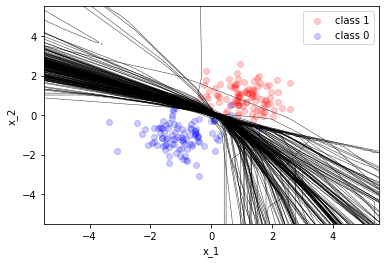

In [22]:
fig,ax = plt.subplots(1,1)
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
for i in range(posterior_sample_size):
    plot_decision_boundary(x_test, y_predict_noiseless[i,:], [nn_dropout], ax, poly_degree=1, test_points=None, shaded=False)

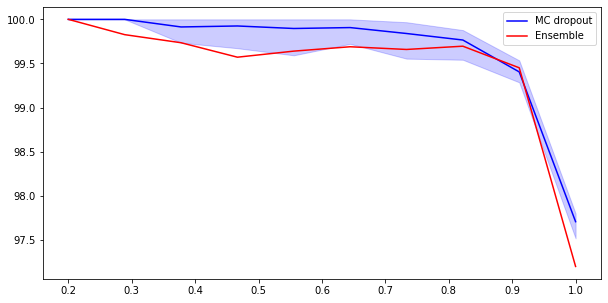

In [81]:
# uncertainty metric
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 20

class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_test = np.vstack((class_0, class_1))
y_test = np.array([0] * samples + [1] * samples)

retain_perc = np.linspace(0.2, 1, 10)
auc = np.zeros([len(retain_perc),N])
auc_det = np.zeros([len(retain_perc),N])
auc_ens = np.zeros([len(retain_perc),N])
auc_bbvi = np.zeros([len(retain_perc),N])
for (i, perc) in enumerate(retain_perc):
    for j in range(N):
        auc[i,j] = auc_calc(x_test, y_test, nn_dropout, N, perc, "mc")
        auc_bbvi[i,j] = auc_calc(x_test, y_test, nn, N, perc, "bbvi", weightlist=posterior_samples)
        
    auc_ens[i,:] = auc_calc(x_test, y_test, nn_all, 1, perc, "ensemble")

    # use sigmoid probability for retaining data
    auc_det[i,:] = auc_calc(x_test, y_test, nn, N, perc, "deterministic")

auc_ub = np.percentile(auc, 97.5, axis=1)
auc_lb = np.percentile(auc, 2.5, axis=1)

auc_ub_ens = np.percentile(auc_ens, 97.5, axis=1)
auc_lb_ens = np.percentile(auc_ens, 2.5, axis=1)

auc_ub_bbvi = np.percentile(auc_bbvi, 97.5, axis=1)
auc_lb_bbvi = np.percentile(auc_bbvi, 2.5, axis=1)



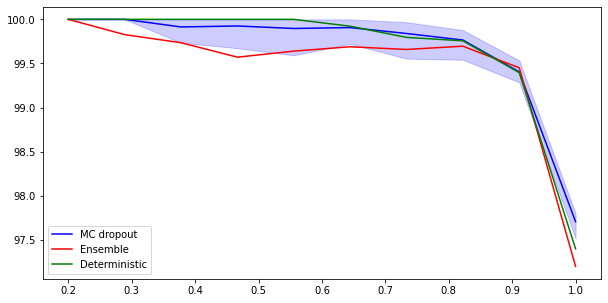

In [82]:

fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.fill_between(retain_perc, auc_ub, auc_lb, color='blue', alpha=0.2)
ax.plot(retain_perc, np.mean(auc,axis=1), 'blue', label='MC dropout')
ax.plot(retain_perc, np.mean(auc_ens,axis=1), 'red', label='Ensemble')
# ax.plot(retain_perc, np.mean(auc_bbvi,axis=1), 'purple', label='BBVI')
ax.plot(retain_perc, np.mean(auc_det,axis=1), 'green', label='Deterministic')
# ax.fill_between(retain_perc, auc_ub_bbvi, auc_lb_bbvi, color='purple', alpha=0.2)
# ax.fill_between(retain_perc, auc_ub_ens, auc_lb_ens, color='purple', alpha=0.2)
ax.legend()
ax.set_ylabel("Accuracy")
ax.set_xlabel("")
plt.show()

In [ ]:
fig,ax = plt.subplots(1,1)
ax.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], alpha=0.2, c='blue', label='class 0')

In [74]:
def myentropy(nn_model, weightlist, xdata):
    '''
    Usage: for NN_Dropout, use the same weights, duplicated N times
    for MFVI, pass the sampled weights
    '''

    #assert xdata.shape[0]==2
    n_samples = xdata.shape[1]
    p1narray = np.zeros((len(weightlist), n_samples))
    if type(nn_model) != list: 
        for i, w in enumerate(weightlist):
#             print(w.shape)
            w = np.reshape(w, (1, nn_model.D))
            p1narray[i, :] = nn_model.forward(w, xdata) #assumes that the 'model.forward' is dropout-like and has generates different outputs for each i
    elif type(nn_model) == list: # deterministic 
        for i, nn in enumerate(nn_model): 

            p1narray[i, :] = nn.forward(weightlist[i], xdata)
    #print (p_here.shape)
    p2narray = 1 - p1narray
    p1narray = np.mean(p1narray, axis=0)
    p2narray = np.mean(p2narray, axis=0)
    Hpredcheck = -p1narray*np.log(p1narray) - p2narray*np.log(p2narray)
    return p1narray, Hpredcheck

# calculate the accuracy for MC dropout
def auc_calc(x_test, y_test, nn, N, perc, model, weightlist=None): 
    p = []
    n_test = len(y_test)
    if model != "deterministic": 
        if model == "mc":
            p_mean, entropymean = myentropy(nn, [nn.weights]*N, x_test.T)
        elif (model == "bbvi") and weightlist is not None: 
            p_mean, entropymean = myentropy(nn, weightlist, x_test.T)
        elif model == "ensemble": # deterministic 
            nn_weights = [] 
            for nn_here in nn: 
                nn_weights.append(nn_here.weights) 
            p_mean, entropymean = myentropy(nn, nn_weights, x_test.T)

        idx = np.argsort(entropymean)
        y_test = y_test[idx]
        p_mean = p_mean[idx]
        y_pred_retained = p_mean[0:int(perc*n_test)] # choosing samples with smallest entropy to evaluate 
        y_test_retained = y_test[0:int(perc*n_test)]
        predict_proba = np.round(y_pred_retained)
  
        auc = len(y_test_retained[predict_proba==y_test_retained]) / len(y_pred_retained) * 100
    else: 
        auc = auc_calc_proba(x_test, y_test, nn, N, perc)
        
    return auc

In [72]:
posterior_samples.shape


(200, 37)